In [1]:
import matplotlib.pyplot as plt
from scipy.stats import binom, beta
from matplotlib import rc, rcParams
import numpy as np
% matplotlib inline

In [2]:
# Binomial model
n, theta = 100, 0.5
s = 50 # for likelihood function
ss = range(n+1)
ps = binom.pmf(ss, n, theta)

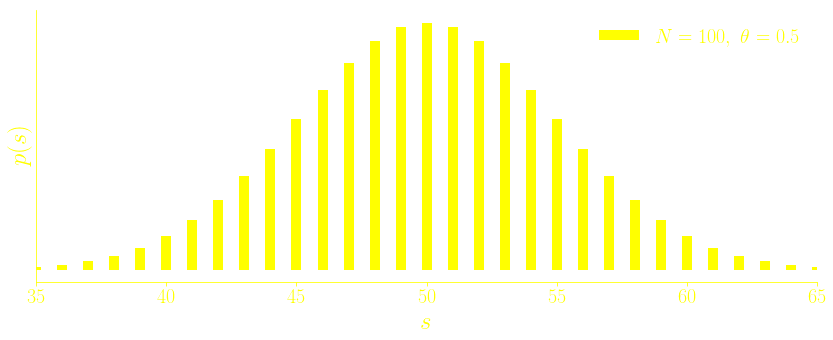

In [3]:
rc('text', usetex=True)
color="yellow"
rcParams.update({'figure.figsize': [14,5],
                 'text.color' : color,
                 'font.size': 20,
                 'axes.labelcolor' : color, 
                 'xtick.color': color, 
                 'ytick.color': color,
                 'legend.framealpha': 0, 
                 'legend.edgecolor': 'none'
                 })


fig, ax = plt.subplots()

ax.axes.set_yticks([])
for side in ['right','top']:
    ax.spines[side].set_visible(False)
legend = "$N={n}, ~ \\theta={theta}$".format(n=n, theta=theta)
ax.vlines(ss, 0, ps, colors="yellow", lw=10, label=r"{}".format(legend))

ax.set_ylabel(r"$p(s)$", fontsize=25)
ax.set_xlabel(r"$s$", fontsize=25)
#ax.set_ylim(0, ax.get_ylim()[1]);
ax.set_xlim(binom.ppf(0.001, n, theta), binom.ppf(0.999, n, theta))
ax.spines['bottom'].set_color(color)
ax.spines['left'].set_color(color)

ax.patch.set_visible(False)
ax.legend()
fig.patch.set_alpha(0.0) # transparent background

fig.savefig("img/binomial_distribution.svg", format='svg', bbox_inches=0, tranparent=True)

In [4]:
# Likelihood function
thetas = np.linspace(0,1,800)
likelihoods = binom.pmf(s, n, thetas)
theta_max = s/n

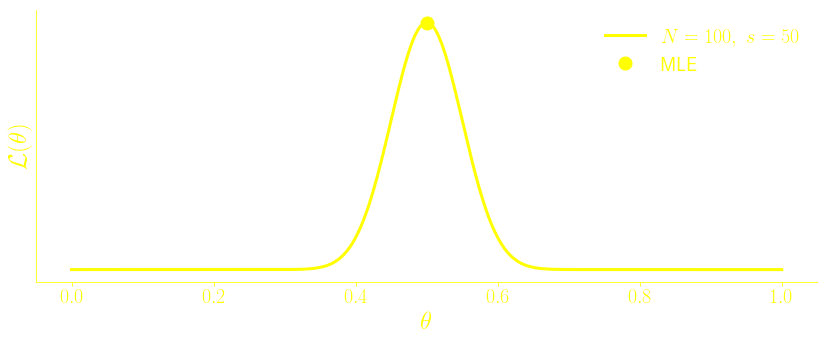

In [5]:
fig, ax = plt.subplots()
ax.axes.set_yticks([])
for side in ['right','top']:
    ax.spines[side].set_visible(False)

legend = "$N={n}, ~ s={s}$".format(n=n, s=s)
ax.plot(thetas, likelihoods, color="yellow", lw=3, label=r"{}".format(legend))
ax.plot(theta_max, binom.pmf(s, n, theta_max), "o", ms=13, mec=color, mfc=color, lw=3, label="MLE")

ax.set_ylabel(r"$\mathcal L(\theta)$", fontsize=25)
ax.set_xlabel(r"$\theta$", fontsize=25)
#ax.set_ylim(0, ax.get_ylim()[1]);
ax.spines['bottom'].set_color(color)
ax.spines['left'].set_color(color)

ax.patch.set_visible(False)
ax.legend()
fig.patch.set_alpha(0.0) # transparent background

fig.savefig("img/likelihood.svg", format='svg', bbox_inches=0, tranparent=True)

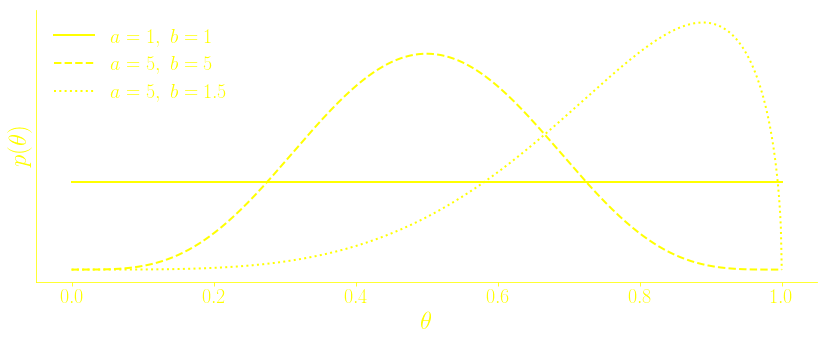

In [8]:
# Beta distribution


fig, ax = plt.subplots()
ax.axes.set_yticks([])
for side in ['right','top']:
    ax.spines[side].set_visible(False)

legend = "$a={a}, ~ b={b}$".format(a=1, b=1)
ax.plot(thetas, beta(1,1).pdf(thetas), color="yellow", lw=2, label=r"{}".format(legend))

legend = "$a={a}, ~ b={b}$".format(a=5, b=5)
ax.plot(thetas, beta(5,5).pdf(thetas), ls="--", color="yellow",  lw=2, label=r"{}".format(legend))

legend = "$a={a}, ~ b={b}$".format(a=5, b=1.5)
ax.plot(thetas, beta(5, 1.5).pdf(thetas), ls=":", color="yellow",  lw=2, label=r"{}".format(legend))

ax.set_ylabel(r"$p(\theta)$", fontsize=25)
ax.set_xlabel(r"$\theta$", fontsize=25)
#ax.set_ylim(0, ax.get_ylim()[1]);
ax.spines['bottom'].set_color(color)
ax.spines['left'].set_color(color)

ax.patch.set_visible(False)
ax.legend()
fig.patch.set_alpha(0.0) # transparent background
fig.savefig("img/beta.svg", format='svg', bbox_inches=0, tranparent=True)

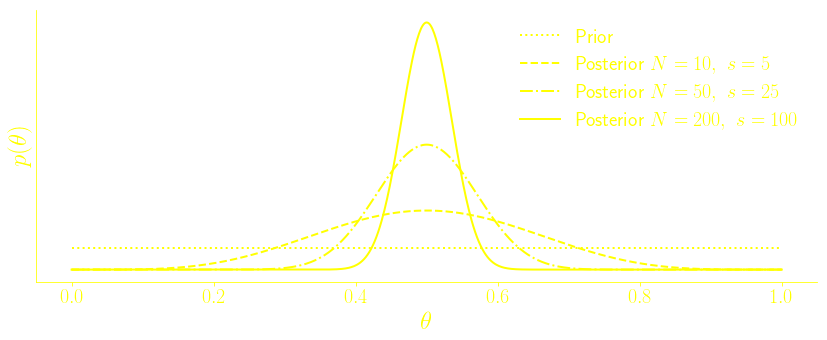

In [16]:
# Posterior

fig, ax = plt.subplots()
ax.axes.set_yticks([])
for side in ['right','top']:
    ax.spines[side].set_visible(False)

legend = "Prior".format(a=1, b=1)
ax.plot(thetas, beta(1,1).pdf(thetas), ls=":",  color="yellow", lw=2, label=r"{}".format(legend))

legend = "Posterior $N={a}, ~ s={b}$".format(a=10, b=5)
ax.plot(thetas, beta(6,6).pdf(thetas), ls="--", color="yellow",  lw=2, label=r"{}".format(legend))

legend = "Posterior $N={a}, ~ s={b}$".format(a=50, b=25)
ax.plot(thetas, beta(26, 26).pdf(thetas), ls="-.", color="yellow",  lw=2, label=r"{}".format(legend))

legend = "Posterior $N={a}, ~ s={b}$".format(a=200, b=100)
ax.plot(thetas, beta(101, 101).pdf(thetas), ls="-", color="yellow",  lw=2, label=r"{}".format(legend))

ax.set_ylabel(r"$p(\theta)$", fontsize=25)
ax.set_xlabel(r"$\theta$", fontsize=25)
#ax.set_ylim(0, ax.get_ylim()[1]);
ax.spines['bottom'].set_color(color)
ax.spines['left'].set_color(color)

ax.patch.set_visible(False)
ax.legend()
fig.patch.set_alpha(0.0) # transparent background
fig.savefig("img/posterior.svg", format='svg', bbox_inches=0, tranparent=True)